## 1. Introduction
Linear Regression is a **supervised learning algorithm** used to predict a continuous target variable based on one or more input features.  

- **Simple Linear Regression:** One independent variable.  
- **Multiple Linear Regression:** More than one independent variable.  




## 2. Applications
- Predicting house prices  
- Forecasting sales  
- Estimating exam scores  
- Financial market predictions  

---


Epoch	Train MSE	Test MSE
1	543872924.43		136465650.17
2	529606192.87		128174973.49
3	519044293.79		123170631.04
4	509872634.41		118979208.42
5	501638738.74		115287960.52
6	494114693.25		111960320.88
7	487159969.11		108917202.16
8	480679025.96		106106927.52
9	474602651.12		103493091.62
10	468878376.97		101048657.86
11	463465048.99		98752746.36
12	458329516.22		96588739.06
13	453444499.79		94543090.80
14	448787157.92		92604545.85
15	444338084.31		90763600.67

Final Model Coefficient: [11950.41286611]
Final Model Intercept: [10051.96189387]


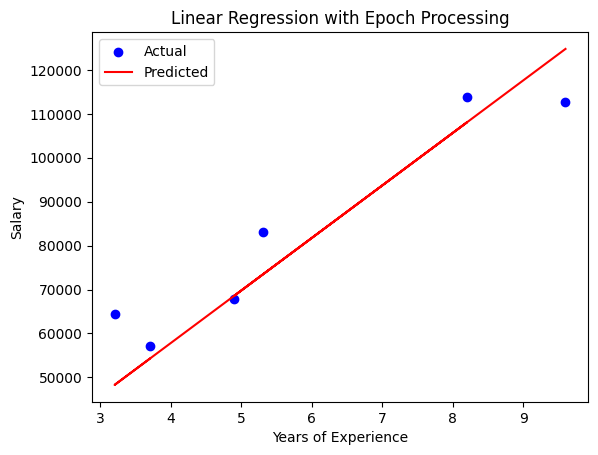

In [4]:
# ==============================
# Linear Regression with Epoch Processing: Salary Prediction
# ==============================

# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Create Dataset (self-contained)
data = pd.DataFrame({
    'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7,
                        3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0,
                        6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 1.5],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189,
               63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940,
               91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872]
})

# 3. Define features and target
X = data[['YearsExperience']].values
y = data['Salary'].values

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize SGDRegressor
sgd_model = SGDRegressor(max_iter=1, tol=None, eta0=0.01, random_state=42)

# 6. Train with explicit epochs
epochs = 15
print("Epoch\tTrain MSE\tTest MSE")
for epoch in range(1, epochs+1):
    sgd_model.partial_fit(X_train, y_train)  # one pass over training data

    # Predictions
    y_train_pred = sgd_model.predict(X_train)
    y_test_pred = sgd_model.predict(X_test)

    # Calculate MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f"{epoch}\t{train_mse:.2f}\t\t{test_mse:.2f}")

# 7. Final model parameters
print("\nFinal Model Coefficient:", sgd_model.coef_)
print("Final Model Intercept:", sgd_model.intercept_)

# 8. Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, sgd_model.predict(X_test), color='red', label='Predicted')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression with Epoch Processing")
plt.legend()
plt.show()


## Multiple Linear Regression

Epoch	Train MSE	Test MSE
1	11849425446564939824103424.00		11388075747545116460449792.00
2	15925177495398733236404224.00		14952382855479162470137856.00
3	3406840578550295418634240.00		3177082669421484327305216.00
4	5233842758675684401348608.00		5111067950246870623715328.00
5	3233536438583469031817216.00		3159885077877544416444416.00
6	9236174563198308118953984.00		8681382811823004725542912.00
7	7165951283096382823464960.00		6744211514531958191292416.00
8	5079713977566980118413312.00		4862680897494965454635008.00
9	6016808081650933861187584.00		5706340049763513298583552.00
10	4101234205309745298931712.00		3905519863936903704215552.00

Final Coefficients: [-6.17872152e+09  4.92870637e+10  1.50495391e+10]
Final Intercept: [4.4100022e+09]


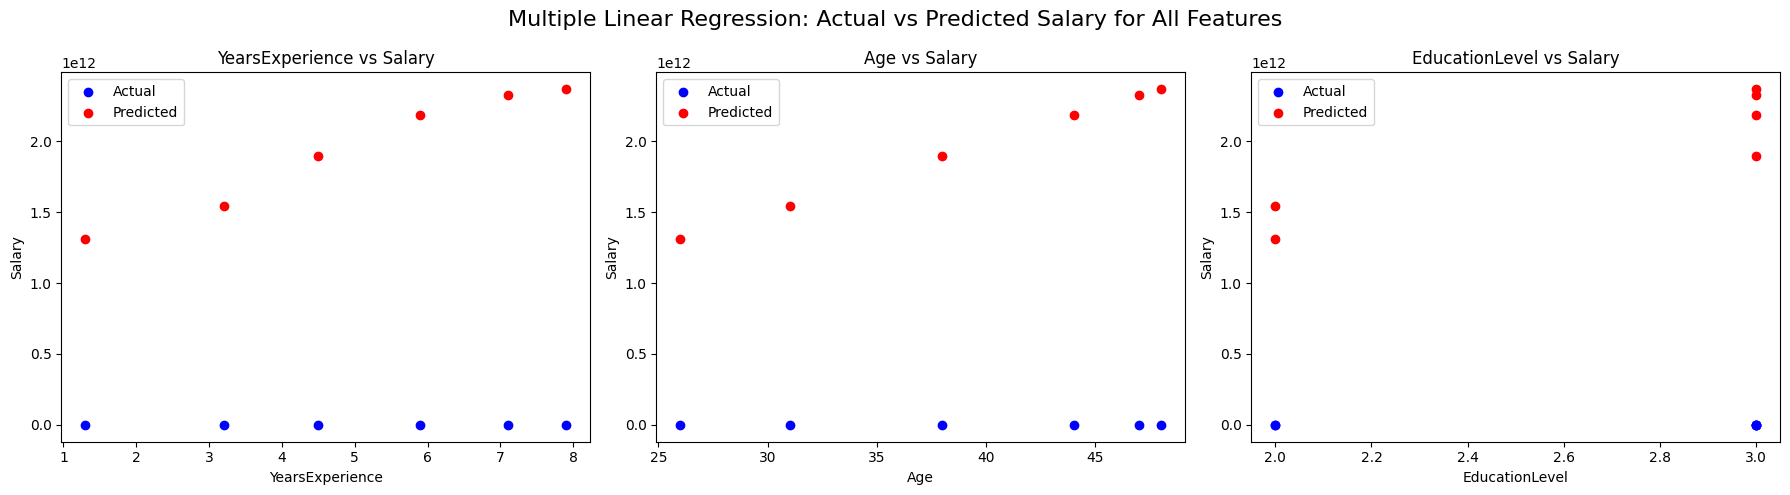

In [ ]:
# ==============================
# Multiple Linear Regression with Epochs: Salary Prediction
# ==============================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Create Self-Contained Dataset
# Features: YearsExperience, Age, EducationLevel
# Target: Salary
data = pd.DataFrame({
    'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7,
                        3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0,
                        6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5],
    'Age': [25, 26, 24, 28, 27, 30, 32, 31, 33, 34,
            35, 36, 36, 37, 38, 40, 41, 42, 44, 45,
            46, 47, 48, 49, 50, 51, 52, 53, 54, 55],
    'EducationLevel': [1, 2, 1, 2, 2, 3, 3, 2, 2, 3,
                       3, 3, 2, 2, 3, 3, 3, 3, 3, 3,
                       3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189,
               63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940,
               91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872]
})

# 3. Define features (X) and target (y)
X = data[['YearsExperience', 'Age', 'EducationLevel']].values
y = data['Salary'].values

# 4. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# 5. Initialize SGDRegressor for Multiple Linear Regression
sgd_model = SGDRegressor(max_iter=1, tol=None, eta0=0.01, random_state=12)

# 6. Train with explicit epochs
epochs = 10
print("Epoch\tTrain MSE\tTest MSE")
for epoch in range(1, epochs + 1):
    sgd_model.partial_fit(X_train, y_train)  # one pass over training data

    # Predictions
    y_train_pred = sgd_model.predict(X_train)
    y_test_pred = sgd_model.predict(X_test)

    # Compute MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f"{epoch}\t{train_mse:.2f}\t\t{test_mse:.2f}")

# 7. Final model parameters
print("\nFinal Coefficients:", sgd_model.coef_)
print("Final Intercept:", sgd_model.intercept_)

# 8. Visualization: Actual vs Predicted for each feature
features = ['YearsExperience', 'Age', 'EducationLevel']
X_test_df = pd.DataFrame(X_test, columns=features)
y_test_pred = sgd_model.predict(X_test)

plt.figure(figsize=(18, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_test_df[feature], y_test, color='blue', label='Actual')
    plt.scatter(X_test_df[feature], y_test_pred, color='red', label='Predicted')
    plt.xlabel(feature)
    plt.ylabel("Salary")
    plt.title(f"{feature} vs Salary")
    plt.legend()

plt.suptitle("Multiple Linear Regression: Actual vs Predicted Salary for All Features", fontsize=16)
plt.tight_layout()
plt.show()
